# Classification model and evaluation usig SVM
- SVM: support vector machines and comes in two flavors 
    1) SVC: classification 
    2) SVR: regression 
- It is a ML alg that separates the classes using a hyperplane. It also defines the margins between the hyperplane (aka the support vector)

In [12]:
pip install sklearn_preprocessing

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm #svm model = support vector machines 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import MinMaxScaler


In [4]:
df = pd.read_csv("C:\\Users\\chand\\Documents\\Git Repos\\AIML-1\\StatsDatasets\\heart.txt")
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


Data Dictionary 
- age
- sex
- chest pain type (4 values)
- RestBP: resting blood pressure
- Chol: serum cholestoral in mg/dl
- Fbs: fasting blood sugar > 120 mg/dl
- RestECG: resting electrocardiographic results (values 0,1,2)
- MaxHR: maximum heart rate achieved
- ExAng: exercise induced angina
- Oldpeak: ST depression induced by exercise relative to rest
- Slope: the slope of the peak exercise ST segment
- Ca: number of major vessels (0-3) colored by flourosopy
- thal: thalassemia 0 = normal; 1 = fixed defect; 2 = reversable defect
- AHD (target): Acquired Heart Disease

In [8]:
df.groupby("AHD")[["Age","Sex"]].mean()

,Age,Sex
AHD,,
No,52.585366,0.560976
Yes,56.625899,0.820144


In [9]:
x = pd.get_dummies(df.drop("AHD",axis=1), columns=["ChestPain","Thal"],dtype=int)
x.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0,0,0,1,0,0,1,0


In [10]:
y = df["AHD"]

In [21]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled


array([[0.70833333, 1.        , 0.48113208, ..., 1.        , 0.        ,
        0.        ],
       [0.79166667, 1.        , 0.62264151, ..., 0.        , 1.        ,
        0.        ],
       [0.79166667, 1.        , 0.24528302, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.58333333, 1.        , 0.33962264, ..., 0.        , 0.        ,
        1.        ],
       [0.58333333, 0.        , 0.33962264, ..., 0.        , 1.        ,
        0.        ],
       [0.1875    , 1.        , 0.41509434, ..., 0.        , 1.        ,
        0.        ]])

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=100)


In [28]:
svc_mod = svm.SVC()
param_grid = {
    'C':[1,10,100,1000,10000],
    'gamma':[0.0001,0.001,0.01,0.1],
    'kernel':['rbf','linear']
}

In [29]:
GS = GridSearchCV(svc_mod,param_grid,cv=6,verbose=2)

my_gs = GS.fit(x_train,y_train)

Fitting 6 folds for each of 40 candidates, totalling 240 fits
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, 

In [30]:
print(my_gs.best_params_)

{'C': 10000, 'gamma': 0.001, 'kernel': 'rbf'}


basic evaluation 

In [31]:
accuracy = my_gs.best_score_
accuracy

0.8137195121951218

Advanced evaluation using the confusion matrix 

In [32]:
#predicted values
y_test_hat = my_gs.predict(x_test)

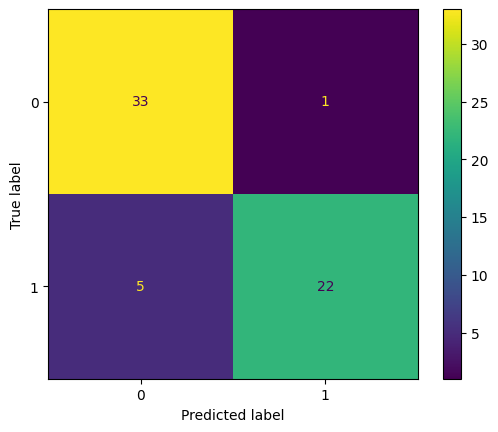

In [36]:
#build confusion matrix 
cm = confusion_matrix(y_test,y_test_hat)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Classification Report 
- Precision: correctly predicted rate 
- Sensitivity (recall): true positive rate

In [37]:
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

          No       0.87      0.97      0.92        34
         Yes       0.96      0.81      0.88        27

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61

